# Reinforcement Learning Group Project

Author: Kim Isabella Zierahn, 6635183


This notebook documents my contributions and code to the group project. It contains checkpoints, thoughts, code snippets, where I tried out things, and plots.


## Checkpoint 1: Get your algorithms up and running

In this part, I am testing my algorithm on a simple environment to see if it is working correctly. I am using the CartPole and LunarLander as discrete actions and Pendulum and HalfCheetah as continuous actions from the OpenAI Gym.

### Testing my algorithm on a simple environment

In [2]:
import gymnasium as gym
import numpy as np
import torch
import matplotlib.pyplot as plt
from PPO import PPO, Memory
from PPG_improved import PPO_init, Memory

### Discrete Action Space: CartPole

In [5]:
env = gym.make("CartPole-v1")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

In [3]:
ppo = PPO(
    state_dim,
    action_dim,
    n_latent_var = 64,
    lr = 0.002,
    betas = (0.9, 0.999),
    gamma = 0.99,
    K_epochs = 10,
    eps_clip = 0.2,
    has_continuous_action_space = False,
    action_std_init = 0.6
    )

In [3]:
def moving_average(data, window_size):
    """Compute the moving average of a list."""
    return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

In [5]:
# Training loop
max_episodes = 1000
max_timesteps = 500
update_timestep = 2000

memory = Memory()
timestep = 0

episode_rewards = []  # List to store rewards for each episode
for episode in range(max_episodes):
    state, _ = env.reset()
    state = state.flatten()  # Ensure the state is 1D
    episode_reward = 0

    for t in range(max_timesteps):
        timestep += 1

        # Sample action
        action = ppo.policy_old.act(state, memory)
        state, reward, done, _, _ = env.step(action)
        state = state.flatten()  # Ensure the state is 1D

        # Save reward and terminal state
        memory.rewards.append(reward)
        memory.is_terminals.append(done)

        episode_reward += reward

        # Update PPO if it's time
        if timestep % update_timestep == 0:
            ppo.update(memory)
            memory.clear_memory()  # Use the correct method to clear memory
            timestep = 0

        if done:
            break

    episode_rewards.append(episode_reward)  # Store the episode reward
    print(f"Episode {episode + 1}, Reward: {episode_reward}")


Episode 1, Reward: 20.0
Episode 2, Reward: 11.0
Episode 3, Reward: 15.0
Episode 4, Reward: 19.0
Episode 5, Reward: 19.0
Episode 6, Reward: 13.0
Episode 7, Reward: 14.0
Episode 8, Reward: 19.0
Episode 9, Reward: 12.0
Episode 10, Reward: 16.0
Episode 11, Reward: 15.0
Episode 12, Reward: 11.0
Episode 13, Reward: 12.0
Episode 14, Reward: 13.0
Episode 15, Reward: 12.0
Episode 16, Reward: 41.0
Episode 17, Reward: 27.0
Episode 18, Reward: 54.0
Episode 19, Reward: 13.0
Episode 20, Reward: 15.0
Episode 21, Reward: 14.0
Episode 22, Reward: 10.0
Episode 23, Reward: 15.0
Episode 24, Reward: 16.0
Episode 25, Reward: 13.0
Episode 26, Reward: 13.0
Episode 27, Reward: 32.0
Episode 28, Reward: 17.0
Episode 29, Reward: 16.0
Episode 30, Reward: 23.0
Episode 31, Reward: 39.0
Episode 32, Reward: 19.0
Episode 33, Reward: 43.0
Episode 34, Reward: 13.0
Episode 35, Reward: 49.0
Episode 36, Reward: 20.0
Episode 37, Reward: 21.0
Episode 38, Reward: 10.0
Episode 39, Reward: 18.0
Episode 40, Reward: 24.0
Episode 4

KeyboardInterrupt: 

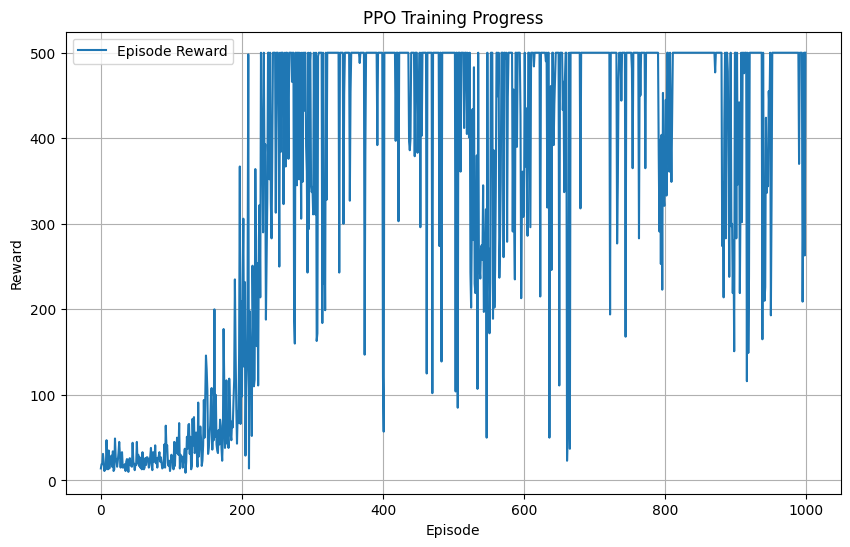

In [12]:
# Plot rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress")
plt.legend()
plt.grid()
plt.show()

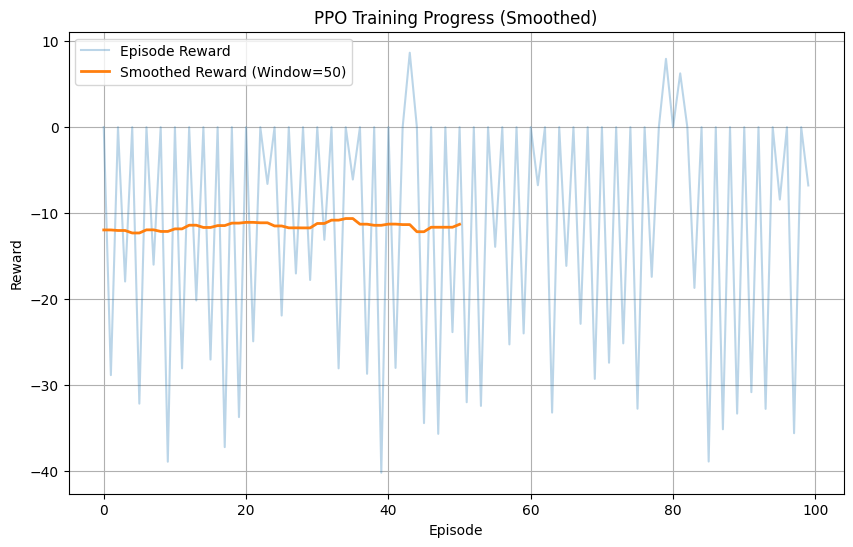

In [11]:
# Smooth the rewards
window_size = 50  # Adjust the window size as needed
smoothed_rewards = moving_average(episode_rewards, window_size)

# Plot smoothed rewards
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Reward", alpha=0.3)
plt.plot(smoothed_rewards, label=f"Smoothed Reward (Window={window_size})", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress (Smoothed)")
plt.legend()
plt.grid()
plt.show()

### Discrete Action Space: LunarLander

In [14]:
env = gym.make("LunarLander-v3")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

In [15]:
ppo = PPO(
    state_dim,
    action_dim,
    n_latent_var = 64,
    lr = 0.002,
    betas = (0.9, 0.999),
    gamma = 0.99,
    K_epochs = 10,
    eps_clip = 0.2,
    has_continuous_action_space = False,
    action_std_init = 0.6
    )

In [16]:
# Training loop
max_episodes = 1000
max_timesteps = 500
update_timestep = 2000

memory = Memory()
timestep = 0

episode_rewards = []  # List to store rewards for each episode
for episode in range(max_episodes):
    state, _ = env.reset()
    state = state.flatten()  # Ensure the state is 1D
    episode_reward = 0

    for t in range(max_timesteps):
        timestep += 1

        # Sample action
        action = ppo.policy_old.act(state, memory)
        state, reward, done, _, _ = env.step(action)
        state = state.flatten()  # Ensure the state is 1D

        # Save reward and terminal state
        memory.rewards.append(reward)
        memory.is_terminals.append(done)

        episode_reward += reward

        # Update PPO if it's time
        if timestep % update_timestep == 0:
            ppo.update(memory)
            memory.clear_memory()  # Use the correct method to clear memory
            timestep = 0

        if done:
            break

    episode_rewards.append(episode_reward)  # Store the episode reward
    print(f"Episode {episode + 1}, Reward: {episode_reward}")


Episode 1, Reward: -305.16999269851203
Episode 2, Reward: -203.65429701958328
Episode 3, Reward: -313.20173068515425
Episode 4, Reward: -176.69046965217007
Episode 5, Reward: -244.43315260247056
Episode 6, Reward: -212.26898869692775
Episode 7, Reward: -104.72689803320476
Episode 8, Reward: -133.34395710979902
Episode 9, Reward: -398.64426517991956
Episode 10, Reward: -219.30232235849252
Episode 11, Reward: -137.39575326325226
Episode 12, Reward: -144.89800243769454
Episode 13, Reward: -109.89764678292508
Episode 14, Reward: -154.54198727814136
Episode 15, Reward: -15.485777641341457
Episode 16, Reward: -226.1766773573802
Episode 17, Reward: -66.99643623201712
Episode 18, Reward: -160.35162419823126
Episode 19, Reward: -101.20549291176567
Episode 20, Reward: -111.58652043172745
Episode 21, Reward: -166.5480527077632
Episode 22, Reward: -129.17880967109414
Episode 23, Reward: -156.7895920139347
Episode 24, Reward: -135.513481629478
Episode 25, Reward: -219.2805151440983
Episode 26, Rewa

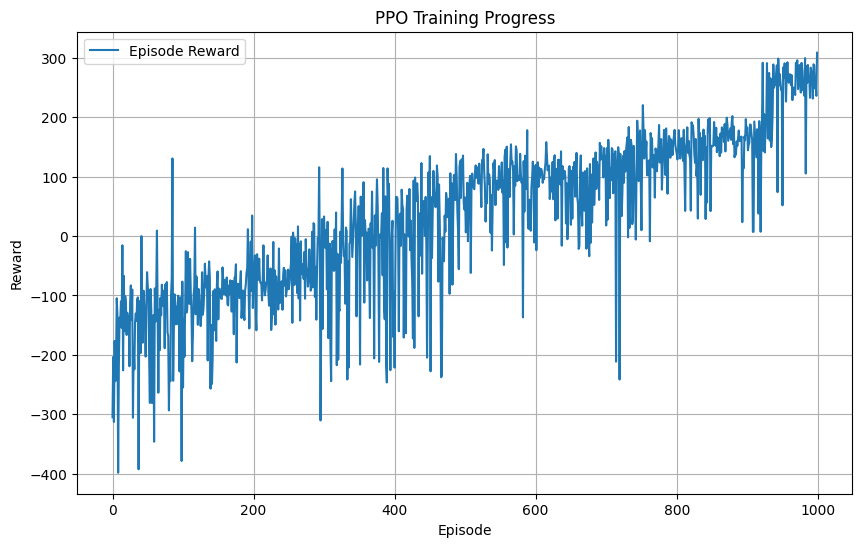

In [17]:
# Plot rewards over episodes
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress")
plt.legend()
plt.grid()
plt.show()

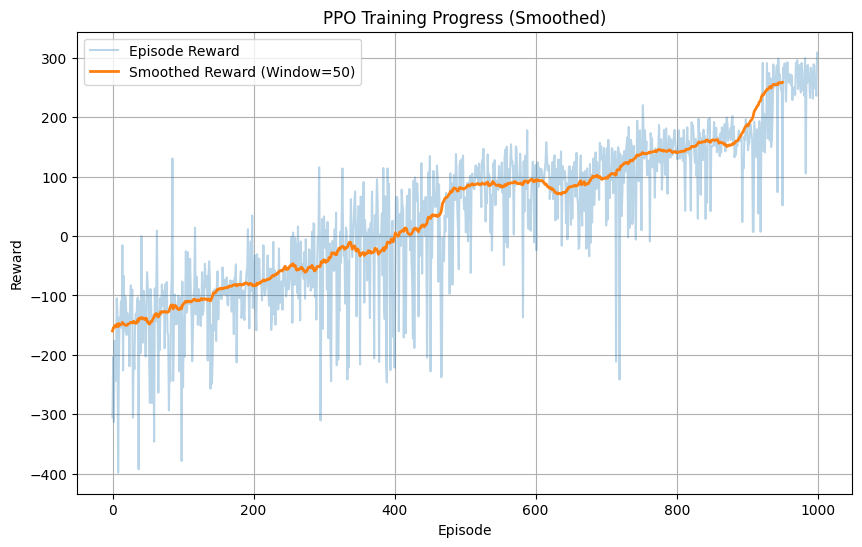

In [19]:
# Smooth the rewards
window_size = 50  # Adjust the window size as needed
smoothed_rewards = moving_average(episode_rewards, window_size)

# Plot smoothed rewards
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Reward", alpha=0.3)
plt.plot(smoothed_rewards, label=f"Smoothed Reward (Window={window_size})", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress (Smoothed)")
plt.legend()
plt.grid()
plt.show()

### Continuous Action Space: Pendulum

In [29]:
env = gym.make("Pendulum-v1")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

In [21]:
ppo = PPO(
    state_dim,
    action_dim,
    n_latent_var = 64,
    lr = 0.002,
    betas = (0.9, 0.999),
    gamma = 0.99,
    K_epochs = 10,
    eps_clip = 0.2,
    has_continuous_action_space = True,
    action_std_init = 0.6
    )

In [67]:
ppo_2 = PPO_init(
    state_dim,
    action_dim,
    n_latent_var_actor = 128,
    n_latent_var_critic = 256,
    lr = 0.002,
    betas = (0.9, 0.999),
    gamma = 0.95,
    K_epochs = 24,
    eps_clip = 0.2,
    has_continuous_action_space = True,
    action_std_init = 0.5,
    c1 = 0.5,
    c2 = 0.01,
    beta_clone = 0.95,
    network_depth_actor = 2,
    network_depth_critic = 4
)

In [68]:
# Training loop
max_episodes = 1000
max_timesteps = 500
update_timestep = 2000

memory = Memory()
timestep = 0

episode_rewards = []  # List to store rewards for each episode
for episode in range(max_episodes):
    state, _ = env.reset()
    state = state.flatten()  # Ensure the state is 1D
    episode_reward = 0

    for t in range(max_timesteps):
        timestep += 1

        # Sample action
        action = ppo_2.policy_old.act(state, memory)
        state, reward, done, _, _ = env.step(action)
        state = state.flatten()  # Ensure the state is 1D

        # Save reward and terminal state
        memory.rewards.append(reward)
        memory.is_terminals.append(done)

        episode_reward += reward

        # Update PPO if it's time
        if timestep % update_timestep == 0:
            ppo_2.update(memory)
            memory.clear_memory()  # Use the correct method to clear memory
            timestep = 0

        if done:
            break

    episode_rewards.append(episode_reward)  # Store the episode reward
    print(f"Episode {episode + 1}, Reward: {episode_reward}")


Episode 1, Reward: -15.38865774865819
Episode 2, Reward: -16.051728767420688
Episode 3, Reward: -12.172291924394884
Episode 4, Reward: -47.38403381332011
Episode 5, Reward: -13.88431920193944
Episode 6, Reward: -36.93582144750298
Episode 7, Reward: -16.026175708808722
Episode 8, Reward: -12.77731472518867
Episode 9, Reward: -5.268360816090699
Episode 10, Reward: -30.85976609768859
Episode 11, Reward: -11.41658011904811
Episode 12, Reward: -52.28082587300893
Episode 13, Reward: -6.5844800117411
Episode 14, Reward: -53.95003578445267
Episode 15, Reward: 6.201678427572303
Episode 16, Reward: -48.03957479986829
Episode 17, Reward: -15.5974147693424
Episode 18, Reward: -50.76387374090773
Episode 19, Reward: -20.156145727895414
Episode 20, Reward: -39.169040584849135
Episode 21, Reward: -17.534439449557272
Episode 22, Reward: -29.59982674059461
Episode 23, Reward: -17.824670027278344
Episode 24, Reward: -54.1627859366817
Episode 25, Reward: -13.451370032038723
Episode 26, Reward: -54.1754201

KeyboardInterrupt: 

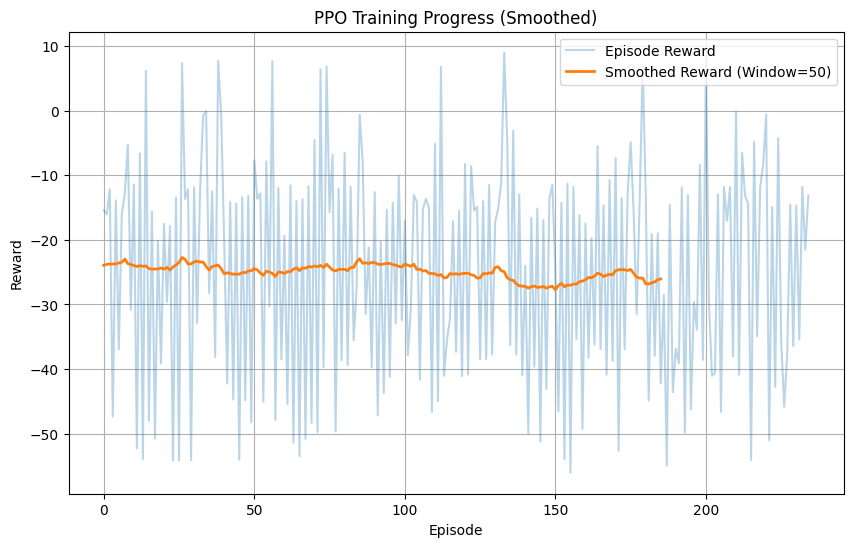

In [69]:
# Smooth the rewards
window_size = 50  # Adjust the window size as needed
smoothed_rewards = moving_average(episode_rewards, window_size)

# Plot smoothed rewards
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Reward", alpha=0.3)
plt.plot(smoothed_rewards, label=f"Smoothed Reward (Window={window_size})", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress (Smoothed)")
plt.legend()
plt.grid()
plt.show()

### Continuous Action Space: HalfCheetah

In [2]:
env = gym.make("HalfCheetah-v5")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]

In [3]:
ppo = PPO(
    state_dim,
    action_dim,
    n_latent_var = 64,
    lr = 0.002,
    betas = (0.9, 0.999),
    gamma = 0.99,
    K_epochs = 10,
    eps_clip = 0.2,
    has_continuous_action_space = True,
    action_std_init = 0.6
    )

In [ ]:
ppo_2 = PPO_init(
    state_dim,
    action_dim,
    n_latent_var_actor = 128,
    n_latent_var_critic = 256,
    lr = 8.9e-03,
    betas = (0.9, 0.999),
    gamma = 0.95,
    K_epochs = 24,
    eps_clip = 0.2,
    has_continuous_action_space = True,
    action_std_init = 0.5,
    c1 = 0.5,
    c2 = 0.01,
    beta_clone = 0.95,
    network_depth_actor = 2,
    network_depth_critic = 4
)

In [4]:
# Training loop
max_episodes = 1000
max_timesteps = 500
update_timestep = 2000

memory = Memory()
timestep = 0

episode_rewards = []  # List to store rewards for each episode
for episode in range(max_episodes):
    state, _ = env.reset()
    state = state.flatten()  # Ensure the state is 1D
    episode_reward = 0

    for t in range(max_timesteps):
        timestep += 1

        # Sample action
        action = ppo_2.policy_old.act(state, memory)
        state, reward, done, _, _ = env.step(action)
        state = state.flatten()  # Ensure the state is 1D

        # Save reward and terminal state
        memory.rewards.append(reward)
        memory.is_terminals.append(done)

        episode_reward += reward

        # Update PPO if it's time
        if timestep % update_timestep == 0:
            ppo_2.update(memory)
            memory.clear_memory()  # Use the correct method to clear memory
            timestep = 0

        if done:
            break

    episode_rewards.append(episode_reward)  # Store the episode reward
    print(f"Episode {episode + 1}, Reward: {episode_reward}")


Episode 1, Reward: -456.54769692616935
Episode 2, Reward: -414.21522709465654
Episode 3, Reward: -345.7420541407264
Episode 4, Reward: -474.20190460339666
Episode 5, Reward: -312.8205308191635
Episode 6, Reward: -443.40950994488696
Episode 7, Reward: -481.00363568323655
Episode 8, Reward: -468.2905505777505
Episode 9, Reward: -204.95201478636307
Episode 10, Reward: -347.78997625375104
Episode 11, Reward: -344.6264915107508
Episode 12, Reward: -438.30348368921614
Episode 13, Reward: -377.1513442911824
Episode 14, Reward: -401.8050974560981
Episode 15, Reward: -318.9222528707217
Episode 16, Reward: -462.5879897870154
Episode 17, Reward: -282.5147328767425
Episode 18, Reward: -248.8313905596283
Episode 19, Reward: -234.62509874704514
Episode 20, Reward: -383.99142314387313
Episode 21, Reward: -379.31110441832305
Episode 22, Reward: -310.0455387974125
Episode 23, Reward: -352.55955020691323
Episode 24, Reward: -347.750256041481
Episode 25, Reward: -464.24333012257574
Episode 26, Reward: -3

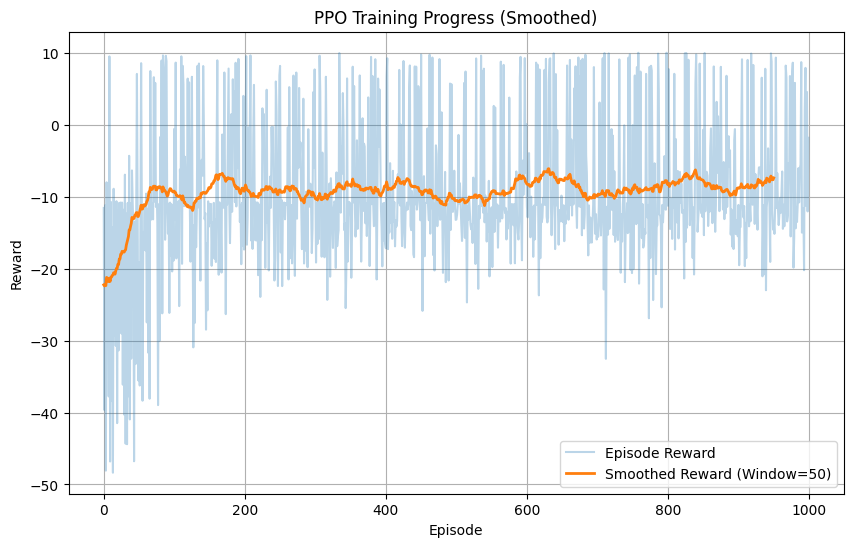

In [41]:
def moving_average(data, window_size):
    """Compute the moving average of a list."""
    return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

# Smooth the rewards
window_size = 50  # Adjust the window size as needed
smoothed_rewards = moving_average(episode_rewards, window_size)

# Plot smoothed rewards
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Reward", alpha=0.3)
plt.plot(smoothed_rewards, label=f"Smoothed Reward (Window={window_size})", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress (Smoothed)")
plt.legend()
plt.grid()
plt.show()

## Checkpoint 2: Hockey – learning to handle the puck

In this part, before training my agent on the cluster, I am trying to see a sensible training behavior, i.e. the reward should increase over time and I am checking the proportion of games I won. I am using the basic opponent for this purpose.

### Vanilla PPO

In [8]:
import hockey.hockey_env as h_env
from hockey.hockey_env import Mode
from PPO import PPO, Memory
from KI_PPO_PPG import PPO_PPG, Memory
from PPG_old import PPO_2

In [22]:
env = h_env.HockeyEnv_BasicOpponent(mode = Mode.NORMAL, weak_opponent = False)
# env = h_env.HockeyEnv(mode = Mode.NORMAL)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = float(env.action_space.high[0])

checkpoint_freq = 500
checkpoint_dir = "./checkpoints_ppg"

update_timestep = 149

ppo = PPO(
    state_dim,
    action_dim,
    n_latent_var = 43,
    lr = 8.988645063280326e-05,
    betas = (0.9, 0.999),
    gamma = 0.9967844742150109,
    K_epochs = 24,
    eps_clip = 0.2788302938997803
)

def train_ppo(env, ppo_agent, num_episodes):
    """
    Training loop with PPG.
    """
    memory = Memory()
    episode_rewards = []  # Track rewards for each episode
    info_list = []  # Track additional info (e.g., winner)

    for episode in range(num_episodes):
        state, _ = env.reset()
        state = state.flatten()  # Ensure the state is 1D
        done = False
        episode_reward = 0  # Initialize episode reward

        # Policy phase: Collect trajectories
        while not done:
            action = ppo_agent.policy_old.act(state, memory)

            opponent_action = np.zeros(action_dim)
            final_action = np.concatenate([action, opponent_action])

            next_state, reward, done, t, info = env.step(final_action)
            next_state = state.flatten()

            memory.rewards.append(reward)
            memory.is_terminals.append(done)
            episode_reward += reward
            state = next_state

        if episode % update_timestep == 0:
            ppo_agent.update(memory)
            memory.clear_memory()
            timestep = 0

        # memory.clear_memory()

        # Log episode results
        episode_rewards.append(episode_reward)
        info_list.append(info.get("winner", None))
        print(f"Episode {episode + 1}, Reward: {episode_reward}")

        if episode % checkpoint_freq == 0:
            ppo_agent.save_checkpoint(checkpoint_dir, episode)

    return episode_rewards, info_list, ppo_agent

episode_rewards_ppo, info_list_ppo, ppo = train_ppo(env, ppo, num_episodes = 1001)

Episode 1, Reward: 0.0
Checkpoint saved at ./checkpoints_ppg/checkpoint_0.pth
Episode 2, Reward: -42.40754566793589
Episode 3, Reward: 0.0
Episode 4, Reward: -17.876294248384788
Episode 5, Reward: 0.0
Episode 6, Reward: -42.15169440880476
Episode 7, Reward: 0.0
Episode 8, Reward: 2.0189077193952167
Episode 9, Reward: 0.0
Episode 10, Reward: -36.86971120441774
Episode 11, Reward: 0.0
Episode 12, Reward: -29.7071556538792
Episode 13, Reward: 0.0
Episode 14, Reward: -14.7310386270783
Episode 15, Reward: 0.0
Episode 16, Reward: -39.052286370985506
Episode 17, Reward: 0.0
Episode 18, Reward: -32.822001323190456
Episode 19, Reward: 0.0
Episode 20, Reward: -39.70899759764653
Episode 21, Reward: 0.0
Episode 22, Reward: -51.954380080857426
Episode 23, Reward: 0.0
Episode 24, Reward: -39.82690791989988
Episode 25, Reward: 0.0
Episode 26, Reward: -38.27559284687219
Episode 27, Reward: 0.0
Episode 28, Reward: -44.05132554665576
Episode 29, Reward: 0.0
Episode 30, Reward: 8.24033207906249
Episode 3

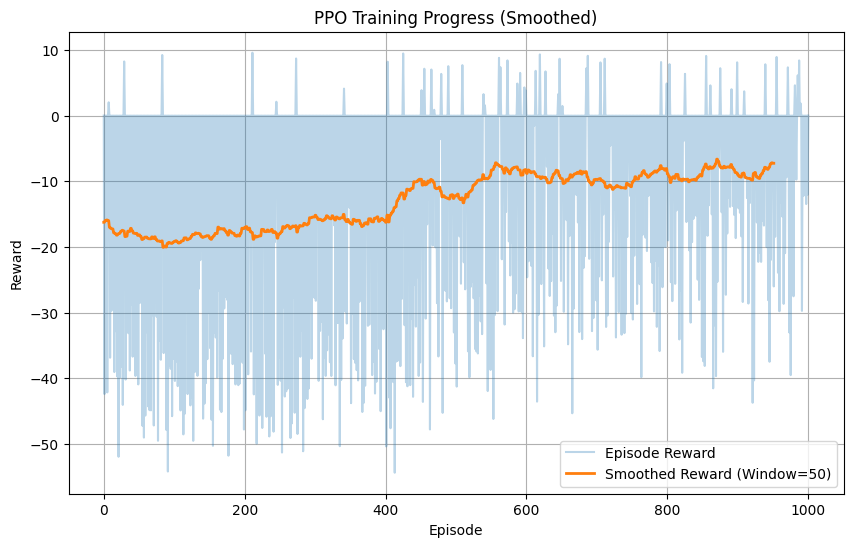

In [23]:
# Smooth the rewards
window_size = 50  # Adjust the window size as needed
smoothed_rewards = moving_average(episode_rewards_ppo, window_size)

# Plot smoothed rewards
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards_ppo, label="Episode Reward", alpha=0.3)
plt.plot(smoothed_rewards, label=f"Smoothed Reward (Window={window_size})", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress (Smoothed)")
plt.legend()
plt.grid()
plt.show()

In [24]:
# calculate the winner cumulative
winner_cum = np.array(info_list_ppo)
winner_cum = np.cumsum(winner_cum)

# calculate the number of 0,-1, 1 for each episode and divide by the number of episodes
num_episodes = len(info_list_ppo)
num_0 = np.sum(np.array(info_list_ppo) == 0)
num_1 = np.sum(np.array(info_list_ppo) == 1)
num_minus1 = np.sum(np.array(info_list_ppo) == -1)
num_0 = num_0 / num_episodes
num_1 = num_1 / num_episodes
num_minus1 = num_minus1 / num_episodes

In [25]:
num_0, num_1, num_minus1

(0.8381618381618382, 0.06893106893106893, 0.09290709290709291)

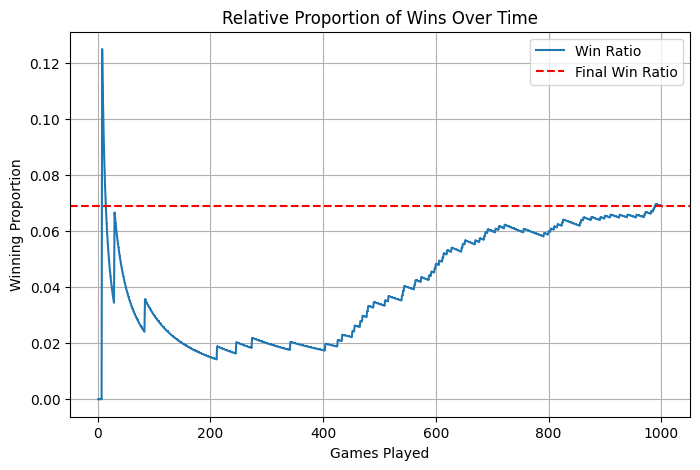

In [26]:
# Convert to numpy array for easier manipulation
info_array = np.array(info_list_ppo)

# Compute cumulative proportion of wins
games_played = np.arange(1, len(info_list_ppo) + 1)  # 1-based index
wins = np.cumsum(info_array == 1)  # Count cumulative wins
win_ratio = wins / games_played  # Compute proportion over time

# Plot the proportion of wins over games played
plt.figure(figsize = (8, 5))
plt.plot(games_played, win_ratio, marker = ',', linestyle = '-', label = "Win Ratio")
plt.axhline(y = num_1, color = 'r', linestyle = '--', label = "Final Win Ratio")
plt.xlabel("Games Played")
plt.ylabel("Winning Proportion")
plt.title("Relative Proportion of Wins Over Time")
plt.legend()
plt.grid(True)
plt.show()

### PPG

In [7]:
def moving_average(data, window_size):
    """Compute the moving average of a list."""
    return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

In [2]:
env = h_env.HockeyEnv_BasicOpponent(mode = Mode.NORMAL, weak_opponent = False)
# env = h_env.HockeyEnv(mode = Mode.NORMAL)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = float(env.action_space.high[0])

In [28]:
memory = Memory()
state, _ = env.reset()
state = state.flatten()
action = ppo.policy_old.act(state, memory)
action


opponent_action = np.zeros(action_dim)
final_action = np.concatenate([action, opponent_action])

state, reward, done, t, info = env.step(final_action)

reward, info

(-0.07030391394279492,
 {'winner': 0,
  'reward_closeness_to_puck': -0.07030391394279492,
  'reward_touch_puck': 0.0,
  'reward_puck_direction': 0.0})

In [8]:
ppo = PPO(
    state_dim,
    action_dim,
    n_latent_var = 178,
    lr = 0.0001,
    betas = (0.9, 0.999),
    gamma = 0.96,
    K_epochs = 10,
    eps_clip = 0.21,
    has_continuous_action_space = True,
    action_std_init = 0.44
    )

In [6]:
ppg = PPO_PPG(
    state_dim,
    action_dim,
    n_latent_var = 64,
    lr = 0.002,
    betas = (0.9, 0.999),
    gamma = 0.99,
    K_epochs = 10,
    eps_clip = 0.2,
    has_continuous_action_space = True,
    action_std_init = 0.6
)

In [56]:
# Training loop
max_episodes = 1001
max_timesteps = 500
update_timestep = 2000
checkpoint_freq = 500

memory = Memory()
timestep = 0

checkpoint_dir = "./checkpoints"


info_list = []

episode_rewards = []  # List to store rewards for each episode
for episode in range(max_episodes):
    state, _ = env.reset()
    state = state.flatten()  # Ensure the state is 1D
    episode_reward = 0

    for t in range(max_timesteps):
        timestep += 1

        # Sample action
        action = ppo.policy_old.act(state, memory)
        opponent_action = np.zeros(action_dim)
        final_action = np.concatenate([action, opponent_action])

        state, reward, done, t, info = env.step(final_action)
        state = state.flatten()

        # Save reward and terminal state
        memory.rewards.append(reward)
        memory.is_terminals.append(done)

        episode_reward += reward

        # Update PPO if it's time
        if timestep % update_timestep == 0:
            ppo.update(memory)
            memory.clear_memory()  # Use the correct method to clear memory
            timestep = 0

        if done:
            break

    if episode % checkpoint_freq == 0:
        ppo.save_checkpoint(checkpoint_dir, episode)

    episode_rewards.append(episode_reward)  # Store the episode reward
    info_list.append(info["winner"])
    print(f"Episode {episode + 1}, Reward: {episode_reward}")

Checkpoint saved at ./checkpoints/checkpoint_0.pth
Episode 1, Reward: 0.0
Episode 2, Reward: -49.63508753397891
Episode 3, Reward: 0.0
Episode 4, Reward: -38.56237351916722
Episode 5, Reward: 0.0
Episode 6, Reward: -36.46585172141293
Episode 7, Reward: 0.0
Episode 8, Reward: -47.01439598127745
Episode 9, Reward: 0.0
Episode 10, Reward: -13.36003305092945
Episode 11, Reward: 0.0
Episode 12, Reward: -37.21315638378708
Episode 13, Reward: 0.0
Episode 14, Reward: -30.428745826972328
Episode 15, Reward: 0.0
Episode 16, Reward: -37.478416119822
Episode 17, Reward: 0.0
Episode 18, Reward: -41.03977668124433
Episode 19, Reward: 0.0
Episode 20, Reward: -22.809697720775713
Episode 21, Reward: 0.0
Episode 22, Reward: -27.71840078415967
Episode 23, Reward: 0.0
Episode 24, Reward: -29.98714769683059
Episode 25, Reward: 0.0
Episode 26, Reward: -27.98348709845668
Episode 27, Reward: 0.0
Episode 28, Reward: -31.621901794961833
Episode 29, Reward: 0.0
Episode 30, Reward: -35.195959187023306
Episode 31,

ValueError: Expected parameter loc (Tensor of shape (24681, 4)) of distribution Normal(loc: torch.Size([24681, 4]), scale: torch.Size([24681, 4])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]], grad_fn=<TanhBackward0>)

In [ ]:
ppo.save_checkpoint("./checkpoints/checkpoint_1000.pth")

In [11]:
#### Load Checkpoint ####
episodes = 500
checkpoint_dir = "./checkpoints/"
checkp = "checkpoint_500.pth"
ppo.load_checkpoint(checkpoint_dir + checkp)

# Training loop
max_episodes = 2001
max_timesteps = 500
update_timestep = 5001
checkpoint_freq = 500

memory = Memory()
timestep = 0

info_list = []

episode_rewards = []  # List to store rewards for each episode

for episode in range(episodes, max_episodes):
    state, _ = env.reset()
    state = state.flatten()  # Ensure the state is 1D
    episode_reward = 0

    for t in range(max_timesteps):
        timestep += 1

        # Sample action
        action = ppo.policy_old.act(state, memory)
        opponent_action = np.zeros(action_dim)
        final_action = np.concatenate([action, opponent_action])

        state, reward, done, t, info = env.step(final_action)
        state = state.flatten()

        # Save reward and terminal state
        memory.rewards.append(reward)
        memory.is_terminals.append(done)

        episode_reward += reward

        # Update PPO if it's time
        if timestep % update_timestep == 0:
            ppo.update(memory)
            memory.clear_memory()  # Use the correct method to clear memory
            timestep = 0

        if done:
            break

    if episode % checkpoint_freq == 0:
        ppo.save_checkpoint(checkpoint_dir, episode)

    episode_rewards.append(episode_reward)  # Store the episode reward
    info_list.append(info["winner"])
    print(f"Episode {episode + 1}, Reward: {episode_reward}")

Loaded checkpoint from ./checkpoints/checkpoint_500.pth
Checkpoint saved at ./checkpoints//checkpoint_500.pth
Episode 501, Reward: 0.0
Episode 502, Reward: 2.6507442224151854
Episode 503, Reward: 0.0
Episode 504, Reward: -41.54022867315292
Episode 505, Reward: 0.0
Episode 506, Reward: -18.835136956454974
Episode 507, Reward: 0.0
Episode 508, Reward: -3.1921218349380966
Episode 509, Reward: 0.0
Episode 510, Reward: -23.621017269433594
Episode 511, Reward: 0.0
Episode 512, Reward: -11.10373301072423
Episode 513, Reward: 0.0
Episode 514, Reward: -8.352831432297766
Episode 515, Reward: 0.0
Episode 516, Reward: -30.462219368883414
Episode 517, Reward: 0.0
Episode 518, Reward: -17.726694630407003
Episode 519, Reward: 0.0
Episode 520, Reward: -8.655373037532312
Episode 521, Reward: 0.0
Episode 522, Reward: -15.5562906184254
Episode 523, Reward: 0.0
Episode 524, Reward: -14.592231563933183
Episode 525, Reward: 0.0
Episode 526, Reward: -6.654683772943727
Episode 527, Reward: 0.0
Episode 528, Re

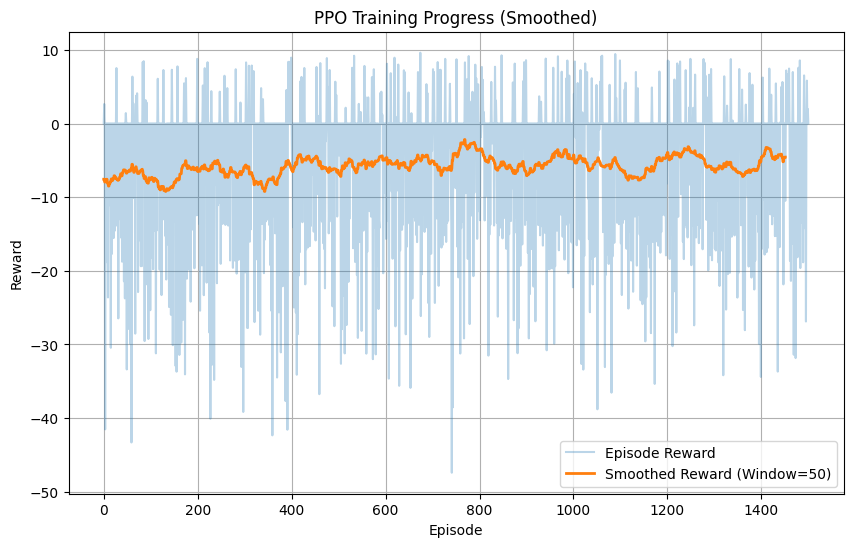

In [12]:
# Smooth the rewards
window_size = 50  # Adjust the window size as needed
smoothed_rewards = moving_average(episode_rewards, window_size)

# Plot smoothed rewards
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards, label="Episode Reward", alpha=0.3)
plt.plot(smoothed_rewards, label=f"Smoothed Reward (Window={window_size})", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress (Smoothed)")
plt.legend()
plt.grid()
plt.show()

In [13]:
info_list

# calculate the winner cumulative
winner_cum = np.array(info_list)
winner_cum = np.cumsum(winner_cum)

# calculate the number of 0,-1, 1 for each episode and divide by the number of episodes
num_episodes = len(info_list)
num_0 = np.sum(np.array(info_list) == 0)
num_1 = np.sum(np.array(info_list) == 1)
num_minus1 = np.sum(np.array(info_list) == -1)
num_0 = num_0 / num_episodes
num_1 = num_1 / num_episodes
num_minus1 = num_minus1 / num_episodes

In [14]:
num_0, num_1, num_minus1

(0.6888740839440373, 0.13524317121918722, 0.1758827448367755)

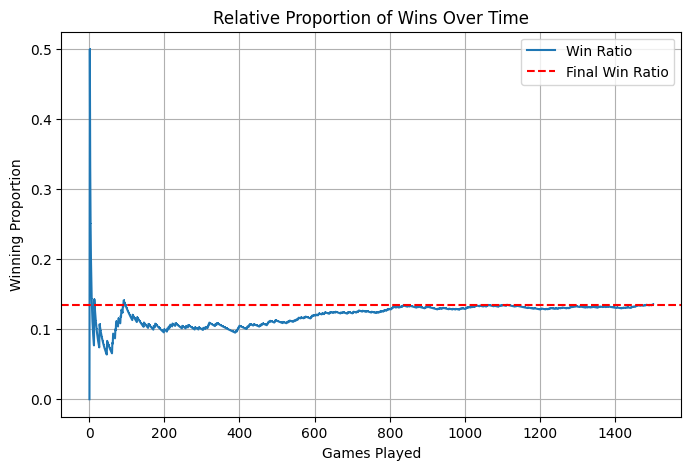

In [15]:
# Convert to numpy array for easier manipulation
info_array = np.array(info_list)

# Compute cumulative proportion of wins
games_played = np.arange(1, len(info_list) + 1)  # 1-based index
wins = np.cumsum(info_array == 1)  # Count cumulative wins
win_ratio = wins / games_played  # Compute proportion over time

# Plot the proportion of wins over games played
plt.figure(figsize = (8, 5))
plt.plot(games_played, win_ratio, marker = ',', linestyle = '-', label = "Win Ratio")
plt.axhline(y = num_1, color = 'r', linestyle = '--', label = "Final Win Ratio")
plt.xlabel("Games Played")
plt.ylabel("Winning Proportion")
plt.title("Relative Proportion of Wins Over Time")
plt.legend()
plt.grid(True)
plt.show()

### Hyperparam Search

In [42]:
import optuna

def train_ppo(lr, gamma, eps_clip, K_epochs, n_latent_var, action_std):
    # Initialize PPO agent with given hyperparameters
    ppo_agent = PPO(state_dim, action_dim, n_latent_var=n_latent_var, lr=lr, gamma=gamma, eps_clip=eps_clip, K_epochs=K_epochs, has_continuous_action_space=True, action_std_init=action_std, betas=(0.9, 0.999))

    memory = Memory()

    # Train the agent
    episode_rewards = []
    for episode in range(100):
        print("Episode: ", episode)

        state, _ = env.reset()
        state = state.flatten()  # Ensure the state is 1D
        done = False
        episode_reward = 0

        while not done:
            action = ppo_agent.policy_old.act(state, memory)

            opponent_action = np.zeros(action_dim)
            final_action = np.concatenate([action, opponent_action])

            next_state, reward, done, t, info = env.step(final_action)
            next_state = state.flatten()

            memory.rewards.append(reward)
            memory.is_terminals.append(done)
            episode_reward += reward
            state = next_state

        ppo_agent.update(memory)
        episode_rewards.append(episode_reward)

    # Return the average reward
    return torch.mean(torch.tensor(episode_rewards)).item()

def objective(trial):
    lr = trial.suggest_float("lr", 1e-5, 1e-3, log=True)
    gamma = trial.suggest_float("gamma", 0.9, 0.999)
    eps_clip = trial.suggest_float("eps_clip", 0.1, 0.3)
    K_epochs = trial.suggest_int("K_epochs", 4, 20)
    n_latent_var = trial.suggest_int("n_latent_var", 32, 256, log=True)
    action_std = trial.suggest_float("action_std", 0.1, 1.0)
    return train_ppo(lr = lr, gamma = gamma, eps_clip = eps_clip, K_epochs = K_epochs, n_latent_var = n_latent_var, action_std = action_std)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)

[I 2025-02-16 16:45:42,777] A new study created in memory with name: no-name-098aabed-73a6-470a-8b6b-793e70518060


Episode:  0
Checkpoint saved at ./checkpoints/checkpoint_0.pth
Episode:  1
Episode:  2
Episode:  3
Episode:  4
Episode:  5
Episode:  6
Episode:  7
Episode:  8
Episode:  9
Episode:  10
Episode:  11
Episode:  12
Episode:  13
Episode:  14
Episode:  15
Episode:  16
Episode:  17
Episode:  18
Episode:  19
Episode:  20
Episode:  21
Episode:  22


[W 2025-02-16 16:45:51,919] Trial 0 failed with parameters: {'lr': 1.4114460184676477e-05, 'gamma': 0.9726963050836798, 'eps_clip': 0.1960562108504926, 'K_epochs': 9, 'n_latent_var': 87, 'action_std': 0.34030802238124536} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/Users/kimzierahn/PycharmProjects/PuckAI/KI_PPO/.venv/lib/python3.10/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/var/folders/ns/v5bbc_0j39d457lvxpqbvllh0000gn/T/ipykernel_11162/3933076061.py", line 52, in objective
    return train_ppo(lr = lr, gamma = gamma, eps_clip = eps_clip, K_epochs = K_epochs, n_latent_var = n_latent_var, action_std = action_std)
  File "/var/folders/ns/v5bbc_0j39d457lvxpqbvllh0000gn/T/ipykernel_11162/3933076061.py", line 23, in train_ppo
    action = ppo_agent.policy_old.act(state, memory)
  File "/Users/kimzierahn/PycharmProjects/PuckAI/KI_PPO/KI_PPO.py", line 109, in act
    action =

Episode:  23


KeyboardInterrupt: 

### PPG

In [1]:
import hockey.hockey_env as h_env
from hockey.hockey_env import Mode
import gymnasium as gym
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
from PPO import PPO, Memory
# from KI_PPO_PPG import PPO_PPG, Memory
# from KI_PPO_ppg2 import PPO_2
# from PPG_improved import PPO_init, Memory

In [2]:
def moving_average(data, window_size):
    """Compute the moving average of a list."""
    return np.convolve(data, np.ones(window_size) / window_size, mode="valid")

In [3]:
env = h_env.HockeyEnv_BasicOpponent(mode = Mode.NORMAL, weak_opponent = False)

# env = h_env.HockeyEnv(mode = Mode.NORMAL)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
max_action = float(env.action_space.high[0])


# checkpoint_freq = 500
# checkpoint_dir = "./checkpoints_ppg"

# ppo_2 = PPO_init(
#     state_dim,
#     action_dim,
#     n_latent_var_actor = 128,
#     n_latent_var_critic = 256,
#     lr = 8.9e-03,
#     betas = (0.9, 0.999),
#     gamma = 0.95,
#     K_epochs = 24,
#     eps_clip = 0.2,
#     has_continuous_action_space = True,
#     action_std_init = 0.35,
#     c1 = 0.5,
#     c2 = 0.01,
#     beta_clone = 0.95,
#     network_depth_actor = 2,
#     network_depth_critic = 4
# )

ppo_2 = PPO_init(
    state_dim,
    action_dim,
    n_latent_var_actor = 128,
    n_latent_var_critic = 256,
    lr = 0.0003,
    betas = (0.9, 0.999),
    gamma = 0.95,
    K_epochs = 10,
    eps_clip = 0.25,
    has_continuous_action_space = True,
    action_std_init = 0.5,
    c1 = 0.5,
    c2 = 0.01,
    beta_clone = 0.95,
    network_depth_actor = 2,
    network_depth_critic = 4
)

NameError: name 'PPO_init' is not defined

In [4]:
from PPG import PPO
ppg = PPO(
    state_dim,
    action_dim,
    n_latent_var_actor = 128,
    n_latent_var_critic = 128,
    network_depth_actor = 1,
    network_depth_critic = 1,
    has_continuous_action_space = True,
    action_std_init = 0.5,
    lr = 0.003,
    betas = (0.9, 0.999),
    gamma = 0.99,
    K_epochs = 10,
    eps_clip = 0.25,
    c1 = 0.5,
    c2 = 0.01,
    beta_clone = 0.95
)

In [5]:
# update_timestep = 145
# update_timestep = 40
update_timestep = 1000

def train_ppg(env, ppo_agent, num_episodes, aux_phase_freq):
    """
    Training loop with PPG.
    """
    memory = Memory()
    episode_rewards = []  # Track rewards for each episode
    info_list = []  # Track additional info (e.g., winner)

    for episode in range(num_episodes):
        state, _ = env.reset()
        state = state.flatten()
        done = False
        episode_reward = 0

        env = h_env.HockeyEnv(mode = Mode.NORMAL)
        o, info = env.reset()

        mode_random = random.choice([True, False])

        player2 = h_env.BasicOpponent(weak = mode_random)
        obs_agent2 = env.obs_agent_two()

        # Policy phase: Collect trajectories
        while not done:
            action = ppo_agent.policy_old.act(state, memory)

            action_opp = player2.act(obs_agent2)

            next_state, reward, done, _, info = env.step(np.hstack([action, action_opp]))
            next_state = next_state.flatten()

            memory.rewards.append(reward)
            memory.is_terminals.append(done)

            episode_reward += reward  # Accumulate reward
            state = next_state

            obs_agent2 = env.obs_agent_two()


        # Auxiliary phase: Train value function
        if episode % aux_phase_freq == 0:
            ppo_agent.auxiliary_phase(memory)

        if episode % update_timestep == 0:
            ppo_agent.update(memory)
            memory.clear_memory()

        # ppo_agent.update(memory)
        # memory.clear_memory()

        # Log episode results
        episode_rewards.append(episode_reward)
        info_list.append(info.get("winner", None))
        print(f"Episode {episode + 1}, Reward: {episode_reward}")

        # if episode % checkpoint_freq == 0:
        #     ppo_agent.save_checkpoint(checkpoint_dir, episode)

    return episode_rewards, info_list, ppo_agent

episode_rewards_ppg2, info_list_ppg2, ppo_2 = train_ppg(env, ppg, num_episodes = 200300, aux_phase_freq = 50)

Episode 1, Reward: -12.13832765495213
Episode 2, Reward: -13.40203082094024
Episode 3, Reward: -11.190941973988402
Episode 4, Reward: -11.116071851678507
Episode 5, Reward: -11.465351385561384
Episode 6, Reward: -15.88344150135916
Episode 7, Reward: -11.787990955398904
Episode 8, Reward: -13.266986331010767
Episode 9, Reward: -13.77780003133754
Episode 10, Reward: -11.301701560238442
Episode 11, Reward: -2.6957428075043945
Episode 12, Reward: -13.453357689135128
Episode 13, Reward: -24.63605794262825
Episode 14, Reward: -11.246575433480343
Episode 15, Reward: -14.932580885864375
Episode 16, Reward: -5.455747399691911
Episode 17, Reward: -7.360500397802839
Episode 18, Reward: -12.463173537289379
Episode 19, Reward: -22.42031385881563
Episode 20, Reward: -14.383203657647766
Episode 21, Reward: -11.03548579267087
Episode 22, Reward: 3.6900498136535784
Episode 23, Reward: -4.989092186509465
Episode 24, Reward: -18.547630076097946
Episode 25, Reward: 8.74468224908439
Episode 26, Reward: -11

KeyboardInterrupt: 

In [4]:
#### Load Checkpoint ####
episodes = 500
checkpoint_dir = "./cluster/"
checkp = "checkpoint_190000.pth"
ppo_2.load_checkpoint(checkpoint_dir + checkp)

Loaded checkpoint from ./cluster/checkpoint_190000.pth


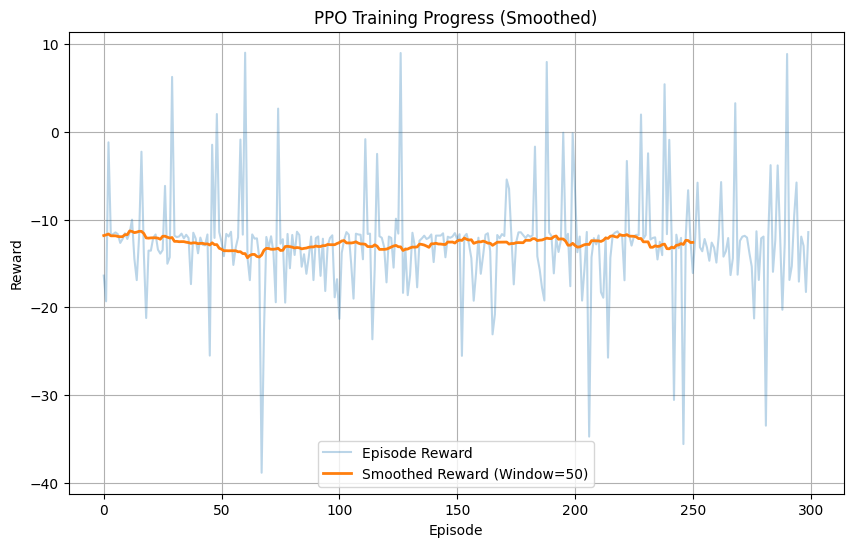

In [5]:
# Smooth the rewards
window_size = 50  # Adjust the window size as needed
smoothed_rewards = moving_average(episode_rewards_ppg2, window_size)

# Plot smoothed rewards
plt.figure(figsize=(10, 6))
plt.plot(episode_rewards_ppg2, label="Episode Reward", alpha=0.3)
plt.plot(smoothed_rewards, label=f"Smoothed Reward (Window={window_size})", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress (Smoothed)")
plt.legend()
plt.grid()
plt.show()

In [60]:
info_list_ppg2

# calculate the winner cumulative
winner_cum = np.array(info_list_ppg2)
winner_cum = np.cumsum(winner_cum)

# calculate the number of 0,-1, 1 for each episode and divide by the number of episodes
num_episodes = len(info_list_ppg2)
num_0 = np.sum(np.array(info_list_ppg2) == 0)
num_1_ppg2 = np.sum(np.array(info_list_ppg2) == 1)
num_minus1 = np.sum(np.array(info_list_ppg2) == -1)
num_0 = num_0 / num_episodes
num_1_ppg2 = num_1_ppg2 / num_episodes
num_minus1 = num_minus1 / num_episodes

In [61]:
num_0, num_1_ppg2, num_minus1

(0.227, 0.051, 0.722)

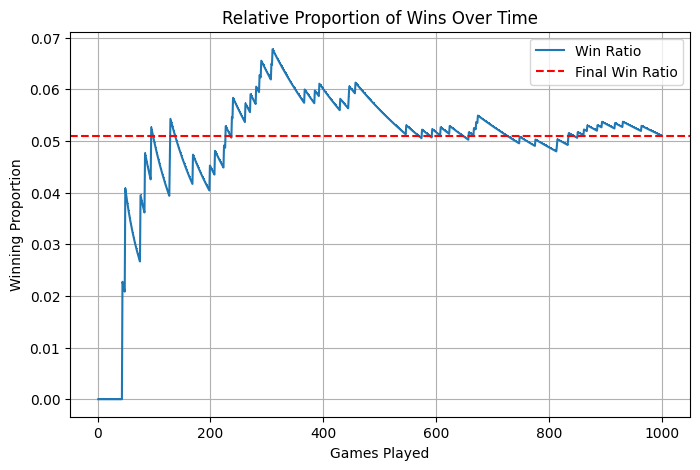

In [62]:
# Convert to numpy array for easier manipulation
info_array = np.array(info_list_ppg2)

# Compute cumulative proportion of wins
games_played = np.arange(1, len(info_list_ppg2) + 1)  # 1-based index
wins = np.cumsum(info_array == 1)  # Count cumulative wins
win_ratio = wins / games_played  # Compute proportion over time

# Plot the proportion of wins over games played
plt.figure(figsize = (8, 5))
plt.plot(games_played, win_ratio, marker = ',', linestyle = '-', label = "Win Ratio")
plt.axhline(y = num_1_ppg2, color = 'r', linestyle = '--', label = "Final Win Ratio")
plt.xlabel("Games Played")
plt.ylabel("Winning Proportion")
plt.title("Relative Proportion of Wins Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Checkpoint 3: Play in normal mode against the basic opponent

In [70]:
### CLUSTER RESULTS

cluster_rew = np.load("cluster/old/episode_rewards_ppg2.npy")
cluster_info = np.load("cluster/old/info_list_ppg2.npy")

In [6]:
cluster_rew_2 = np.load("cluster/episode_rewards_ppg2_2.npy")
cluster_info_2 = np.load("cluster/info_list_ppg2_2.npy")

In [ ]:
# combine lists

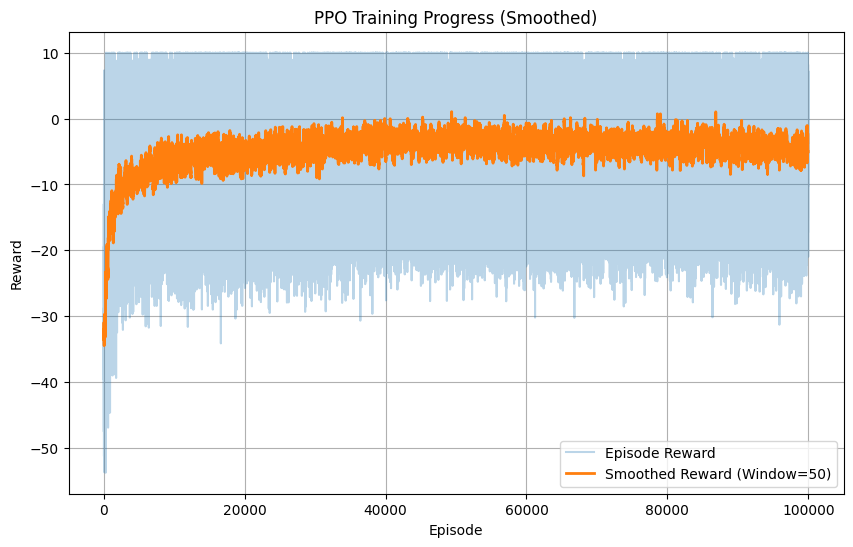

In [8]:
# Smooth the rewards
window_size = 50  # Adjust the window size as needed
smoothed_rewards = moving_average(cluster_rew_2, window_size)

# Plot smoothed rewards
plt.figure(figsize=(10, 6))
plt.plot(cluster_rew_2, label="Episode Reward", alpha=0.3)
plt.plot(smoothed_rewards, label=f"Smoothed Reward (Window={window_size})", linewidth=2)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("PPO Training Progress (Smoothed)")
plt.legend()
plt.grid()
plt.show()

In [9]:
# calculate the winner cumulative
winner_cum = np.array(cluster_info_2)
winner_cum = np.cumsum(winner_cum)

# calculate the number of 0,-1, 1 for each episode and divide by the number of episodes
num_episodes = len(cluster_info_2)
num_0 = np.sum(np.array(cluster_info_2) == 0)
num_1_ppg = np.sum(np.array(cluster_info_2) == 1)
num_minus1 = np.sum(np.array(cluster_info_2) == -1)
num_0 = num_0 / num_episodes
num_1_ppg = num_1_ppg / num_episodes
num_minus1 = num_minus1 / num_episodes

In [10]:
num_0, num_1_ppg, num_minus1

(0.5332946670533295, 0.32771672283277165, 0.13898861011389885)

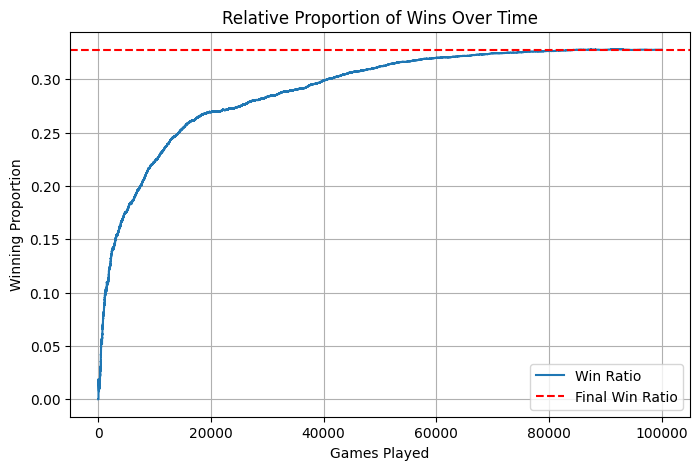

In [11]:
# Convert to numpy array for easier manipulation
info_array = np.array(cluster_info_2)

# Compute cumulative proportion of wins
games_played = np.arange(1, len(cluster_info_2) + 1)  # 1-based index
wins = np.cumsum(info_array == 1)  # Count cumulative wins
win_ratio = wins / games_played  # Compute proportion over time

# Plot the proportion of wins over games played
plt.figure(figsize = (8, 5))
plt.plot(games_played, win_ratio, marker = ',', linestyle = '-', label = "Win Ratio")
plt.axhline(y = num_1_ppg, color = 'r', linestyle = '--', label = "Final Win Ratio")
plt.xlabel("Games Played")
plt.ylabel("Winning Proportion")
plt.title("Relative Proportion of Wins Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Checkpoint 4: Self-play